In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')

# Data display customization
pd.set_option('display.max_rows', 199)
pd.set_option('display.max_columns', 999)

# Set pretty printing format for floats
pd.set_option('float_format', '{:.3f}'.format)

In [2]:
telecom_churn_data = pd.read_csv('telecom_churn_data.csv')
telecom_churn_data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.000,0.000,0.000,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,0.000,0.000,0.000,0.000,nan,nan,0.160,nan,nan,nan,4.130,nan,nan,nan,1.150,nan,nan,nan,5.440,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,0.000,0.000,5.440,0.000,nan,nan,

### Inspecting the data

#### Checking the data info

In [3]:
telecom_churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


#### Checking for duplicate data

In [4]:
telecom_churn_data[telecom_churn_data.duplicated(subset = 'mobile_number')]

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g


There are no duplicate rows

#### Checking for null values

In [5]:
# defining a function for column-wise null value check
def col_wise_null(df):
    percent_missing = df.isnull().sum() * 100 / len(df)
    missing_value_df = pd.DataFrame({'column_name': df.columns, 'percent_missing': percent_missing})
    missing_value_df.reset_index(drop=True, inplace=True)
    return missing_value_df

In [6]:
# defining a function for row-wise null value check
def row_wise_null(df):
    rows_missing_data = df.isnull().sum(axis=1)
    return rows_missing_data

In [7]:
# Checking column-wise null values
missing_value_df = col_wise_null(telecom_churn_data)

In [8]:
# Checking the number of columns with non-zero number of rows with null values
len(missing_value_df[missing_value_df.percent_missing != 0].index)

166

There are a lot of columns (166) with non-zero number of rows with null values. Checking for columns with more than 70% of values as missing values.

In [9]:
missing_value_df[missing_value_df.percent_missing > 70]

,column_name,percent_missing
157,date_of_last_rech_data_6,74.847
158,date_of_last_rech_data_7,74.429
159,date_of_last_rech_data_8,73.661
160,date_of_last_rech_data_9,74.078
161,total_rech_data_6,74.847
162,total_rech_data_7,74.429
163,total_rech_data_8,73.661
164,total_rech_data_9,74.078
165,max_rech_data_6,74.847
166,max_rech_data_7,74.429


First filtering the high-value customers and tagging the churners. Rest of the null value treatment will be done during exploratory data analysis.

#### Filtering High Value Customers

In [10]:
# Checking the null value %ages for recharge related columns required for filtering
rech_cols = telecom_churn_data.columns[telecom_churn_data.columns.str.contains('total_rech_amt|total_rech_data|rech_amt_data')]
missing_value_rech_cols = col_wise_null(telecom_churn_data[rech_cols])
missing_value_rech_cols

,column_name,percent_missing
0,total_rech_amt_6,0.000
1,total_rech_amt_7,0.000
2,total_rech_amt_8,0.000
3,total_rech_amt_9,0.000
4,total_rech_data_6,74.847
5,total_rech_data_7,74.429
6,total_rech_data_8,73.661
7,total_rech_data_9,74.078
8,av_rech_amt_data_6,74.847
9,av_rech_amt_data_7,74.429


There are no null values for total recharge amount columns, but there are considerable null values for data related recharge columns. However, it can be noted that the total_rech_data null value %age for a month is equal to the av_rech_amt_data null value %age. Checking if the corresponding date records are also null.

In [11]:
# Checking for month of June
print(len(telecom_churn_data[telecom_churn_data.date_of_last_rech_data_6.isna() & ~(telecom_churn_data.total_rech_data_6.isna() | telecom_churn_data.av_rech_amt_data_6.isna())]))
# Checking for month of July
print(len(telecom_churn_data[telecom_churn_data.date_of_last_rech_data_7.isna() & ~(telecom_churn_data.total_rech_data_7.isna() | telecom_churn_data.av_rech_amt_data_7.isna())]))
# Checking for month of August
print(len(telecom_churn_data[telecom_churn_data.date_of_last_rech_data_8.isna() & ~(telecom_churn_data.total_rech_data_8.isna() | telecom_churn_data.av_rech_amt_data_8.isna())]))
# Checking for month of September
print(len(telecom_churn_data[telecom_churn_data.date_of_last_rech_data_9.isna() & ~(telecom_churn_data.total_rech_data_9.isna() | telecom_churn_data.av_rech_amt_data_9.isna())]))

0
0
0
0


It can be seen that the date of last recharge for data is null wherever the total_rech_data or av_rech_amt_data is null. It means that no recharge was done in such cases. These columns can be imputed with a value of 0.

In [12]:
telecom_churn_data.total_rech_data_6.fillna(value=0, inplace=True)
telecom_churn_data.total_rech_data_7.fillna(value=0, inplace=True)
telecom_churn_data.total_rech_data_8.fillna(value=0, inplace=True)
telecom_churn_data.total_rech_data_9.fillna(value=0, inplace=True)

telecom_churn_data.av_rech_amt_data_6.fillna(value=0, inplace=True)
telecom_churn_data.av_rech_amt_data_7.fillna(value=0, inplace=True)
telecom_churn_data.av_rech_amt_data_8.fillna(value=0, inplace=True)
telecom_churn_data.av_rech_amt_data_9.fillna(value=0, inplace=True)

In [13]:
# Creating derived variables for total amount of recharge done for data
telecom_churn_data["total_rech_data_amt_6"] = telecom_churn_data["total_rech_data_6"]*telecom_churn_data['av_rech_amt_data_6']
telecom_churn_data["total_rech_data_amt_7"] = telecom_churn_data["total_rech_data_7"]*telecom_churn_data['av_rech_amt_data_7']
telecom_churn_data["total_rech_data_amt_8"] = telecom_churn_data["total_rech_data_8"]*telecom_churn_data['av_rech_amt_data_8']
telecom_churn_data["total_rech_data_amt_9"] = telecom_churn_data["total_rech_data_9"]*telecom_churn_data['av_rech_amt_data_9']

# Dropping total_rech_data_* and av_rech_amt_data_*
cols_to_drop = ["total_rech_data_6", "total_rech_data_7", "total_rech_data_8", "total_rech_data_9", 
                'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9']

telecom_churn_data.drop(cols_to_drop, axis=1, inplace=True)

In [14]:
# Filter high-value customers
avg_rech_6_7 = (telecom_churn_data["total_rech_amt_6"] + telecom_churn_data["total_rech_data_amt_6"] + 
                      telecom_churn_data["total_rech_amt_7"] + telecom_churn_data["total_rech_data_amt_7"]) / 2.0

amt_70th = np.percentile(avg_rech_6_7, 70)

telecom_churn_data = telecom_churn_data[avg_rech_6_7 >= amt_70th]

In [15]:
# Checking the number of rows left
print('Number of high value customers are {}'.format(len(telecom_churn_data)))

Number of high value customers are 30001


#### Identifying Churners

In [16]:
# Missing value check for columns which will be used to tag churners
missing_value_df[missing_value_df.column_name.isin(['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9'])]

,column_name,percent_missing
84,total_og_mou_9,0.000
124,total_ic_mou_9,0.000
184,vol_2g_mb_9,0.000
188,vol_3g_mb_9,0.000


In [17]:
# There are no missing values. Proceeding with tagging churners.
# Tagging churners
usage_9 = telecom_churn_data['total_ic_mou_9'] + telecom_churn_data['total_og_mou_9'] + telecom_churn_data['vol_2g_mb_9'] + telecom_churn_data['vol_3g_mb_9']
telecom_churn_data['churn'] = np.where(usage_9, 0, 1)

In [18]:
# Now that churners have been identified, we can drop the columns for 4th month
# There are few columns with month name in prefix, these can be renamed for consistency
telecom_churn_data.rename(columns={'jun_vbc_3g':'vbc_3g_6','jul_vbc_3g':'vbc_3g_7','aug_vbc_3g':'vbc_3g_8'
                         ,'sep_vbc_3g':'vbc_3g_9'}, inplace=True)

# drop 9th month column as it is not needed
cols_9 = telecom_churn_data.columns[telecom_churn_data.columns.str.contains('_9')]

telecom_churn_data.drop(cols_9,axis=1,inplace=True)

There are a few columns with no variance at all. These columns can be dropped.

In [19]:
# Checking the columns with no variance.
unique_val_count = telecom_churn_data.nunique().sort_values()
unique_val_count[unique_val_count == 1]

std_og_t2c_mou_6        1
circle_id               1
loc_og_t2o_mou          1
std_og_t2o_mou          1
loc_ic_t2o_mou          1
last_date_of_month_6    1
last_date_of_month_7    1
last_date_of_month_8    1
std_ic_t2o_mou_6        1
std_ic_t2o_mou_7        1
std_og_t2c_mou_7        1
std_og_t2c_mou_8        1
std_ic_t2o_mou_8        1
dtype: int64

In [20]:
# Dropping columns with only 1 unique value. Also, mobile_number can be dropped since it won't be used for analysis. 
cols_to_drop = ['circle_id','loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','std_ic_t2o_mou_6','std_ic_t2o_mou_7','std_ic_t2o_mou_8','std_og_t2c_mou_6','std_og_t2c_mou_7','std_og_t2c_mou_8','last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','mobile_number']
telecom_churn_data.drop(cols_to_drop,axis=1,inplace=True)

In [21]:
# Checking the shape of the left data-set
print("The shape of the data set at this point is {}".format(telecom_churn_data.shape))

The shape of the data set at this point is (30001, 155)


Proceeding with EDA and performing null value treatment

### Exploratory Data Analysis (with null value treatment)

In [22]:
# Defining a function for box plots
def box_plot(feature,feature_name):
    plt.rcParams["figure.figsize"] = [16, 7]
    fig = plt.figure()
    f,axes = plt.subplots(nrows=1, ncols=3)
    g = sns.boxplot(data=telecom_churn_data, y=feature+"_6", x="churn",
                hue="churn", linewidth=2.5, showfliers=False, ax=axes[0])
    _ = g.set_xlabel("Churn",fontsize=10,fontweight='bold')
    _ = g.set_ylabel("{} - Good Phase 1st month".format(feature_name),fontsize=10,fontweight='bold')
    g.legend_.remove()
    g = sns.boxplot(data=telecom_churn_data, y=feature+"_7",  x="churn",
                hue="churn", linewidth=2.5, showfliers=False, ax=axes[1])
    _ = g.set_xlabel("Churn",fontsize=10,fontweight='bold')
    _ = g.set_ylabel("{} - Good Phase 2nd month".format(feature_name),fontsize=10,fontweight='bold')
    g.legend_.remove()
    g = sns.boxplot(data=telecom_churn_data, y=feature+"_8",  x="churn",
                hue="churn", linewidth=2.5, showfliers=False, ax=axes[2])
    _ = g.set_xlabel("Churn",fontsize=10,fontweight='bold')
    _ = g.set_ylabel("{} - Action Phase".format(feature_name),fontsize=10,fontweight='bold')
    labels = ['Not Churn','Churn']
    h, l = g.get_legend_handles_labels()
    _ = g.legend(h, labels, title="Churn Status", bbox_to_anchor=(1.4, 1))

#### Churn %age

In [23]:
# Checking the %age of high value customers that churned
print('Around {}% customers churned'.format(round(100*telecom_churn_data.churn.sum()/len(telecom_churn_data),2)))

Around 8.14% customers churned


#### Recharge Amount Columns

In [24]:
rech_amt_by_churn = pd.DataFrame(telecom_churn_data.groupby('churn',as_index=False)['total_rech_amt_6','total_rech_amt_7','total_rech_amt_8'].mean())
rech_amt_by_churn

,churn,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8
0,0,649.575,663.528,613.701
1,1,786.707,626.290,253.153


<Figure size 1152x504 with 0 Axes>

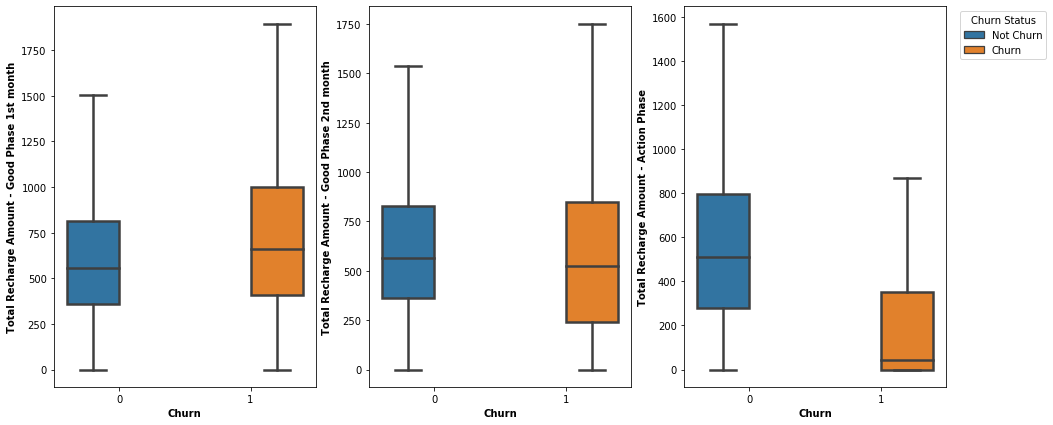

In [25]:
box_plot('total_rech_amt','Total Recharge Amount')

It can be seen that the total recharge amount decreases at first and then decreased drastically in the action phase (8th month) for the customers who churned.

#### Recharge Amount - Data related columns

In [26]:
# First describing the values
telecom_churn_data[['total_rech_data_amt_6','total_rech_data_amt_7','total_rech_data_amt_8']].describe(percentiles=[0.1,.25,.5,.75,.9])

,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8
count,30001.000,30001.000,30001.000
mean,455.777,528.234,463.253
std,1418.671,1476.037,1622.766
min,0.000,0.000,0.000
10%,0.000,0.000,0.000
25%,0.000,0.000,0.000
50%,92.000,100.000,25.000
75%,400.000,575.000,304.000
90%,1120.000,1374.000,1088.000
max,105644.000,55080.000,89106.500


It can be seen that the lower order values are mostly 0, and the higher order values are very large as compared to others. We can check the mean value for a monthly trend comparision.

In [27]:
rech_amt_data_by_churn = pd.DataFrame(telecom_churn_data.groupby('churn',as_index=False)['total_rech_data_amt_6','total_rech_data_amt_7','total_rech_data_amt_8'].mean())
rech_amt_data_by_churn

,churn,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8
0,0,460.077,545.057,496.886
1,1,407.229,338.294,83.523


It can be seen that there is a drastic drop in the mean data recharge amount from the 7th month to 8th month. We can plot the spread of data recharge amount categorized by the churn flag.

<Figure size 1152x504 with 0 Axes>

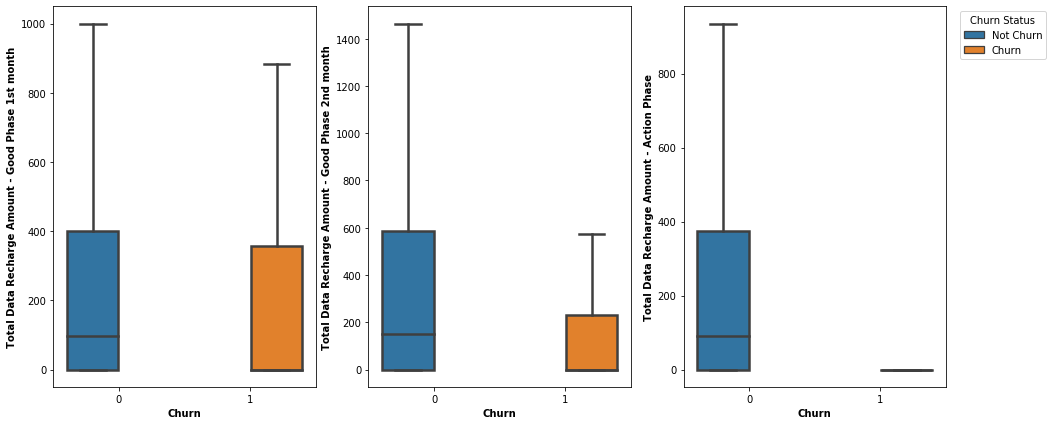

In [28]:
box_plot('total_rech_data_amt','Total Data Recharge Amount')

It can be seen that the value of the recharge done for data decreased from good month to action month.

#### Max Recharge Amount

In [29]:
max_rech_amt_by_churn = pd.DataFrame(telecom_churn_data.groupby('churn',as_index=False)['max_rech_amt_6','max_rech_amt_7','max_rech_amt_8'].mean())
max_rech_amt_by_churn

,churn,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8
0,0,169.049,173.337,166.767
1,1,171.942,159.389,85.371


We can observe that the mean max recharge amount decreases significantly for customers who churned.

<Figure size 1152x504 with 0 Axes>

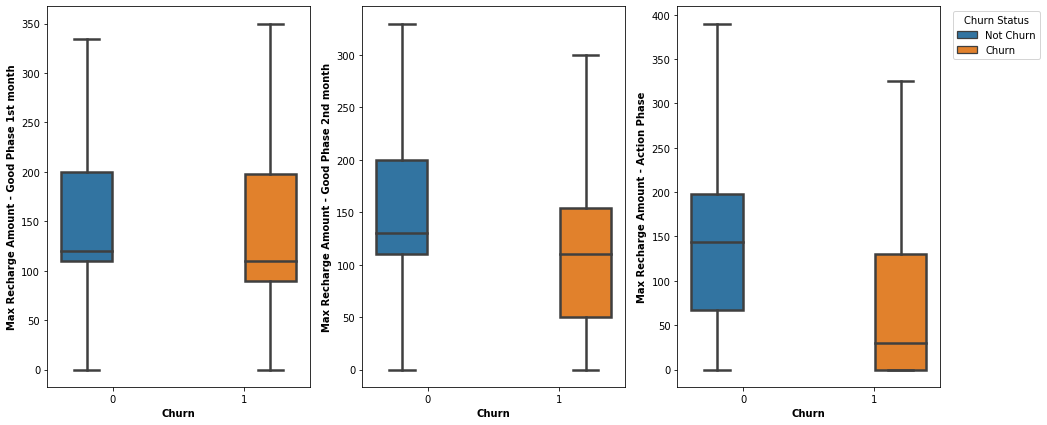

In [30]:
box_plot('max_rech_amt','Max Recharge Amount')

We observe drop in maximum recharge amount as well.

In [31]:
""" Now that we have done EDA on these three columns (total recharge, total recharge for data and maximum recharge),
we can derive new features from them. 
These will be the good phase features which can be the average value of the 6th month and the 7th month"""


telecom_churn_data['rech_amt_good_phase'] = (telecom_churn_data.total_rech_amt_6 + telecom_churn_data.total_rech_amt_7)/2
telecom_churn_data['rech_amt_data_good_phase'] = (telecom_churn_data.total_rech_data_amt_6 + telecom_churn_data.total_rech_data_amt_7)/2
telecom_churn_data['max_rech_amt_good_phase'] = (telecom_churn_data.max_rech_amt_6 + telecom_churn_data.max_rech_amt_7)/2

# dropping the original columns
telecom_churn_data.drop(['total_rech_amt_6','total_rech_amt_7'
              ,'max_rech_amt_6','max_rech_amt_7','total_rech_data_amt_6','total_rech_data_amt_7'],axis=1,inplace=True)

#### Last Day Recharge Amount

In [32]:
last_day_rech_amt_by_churn = pd.DataFrame(telecom_churn_data.groupby('churn',as_index=False)['last_day_rch_amt_6','last_day_rch_amt_7','last_day_rch_amt_8'].mean())
last_day_rech_amt_by_churn

,churn,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8
0,0,100.587,102.276,97.417
1,1,104.356,78.684,35.680


<Figure size 1152x504 with 0 Axes>

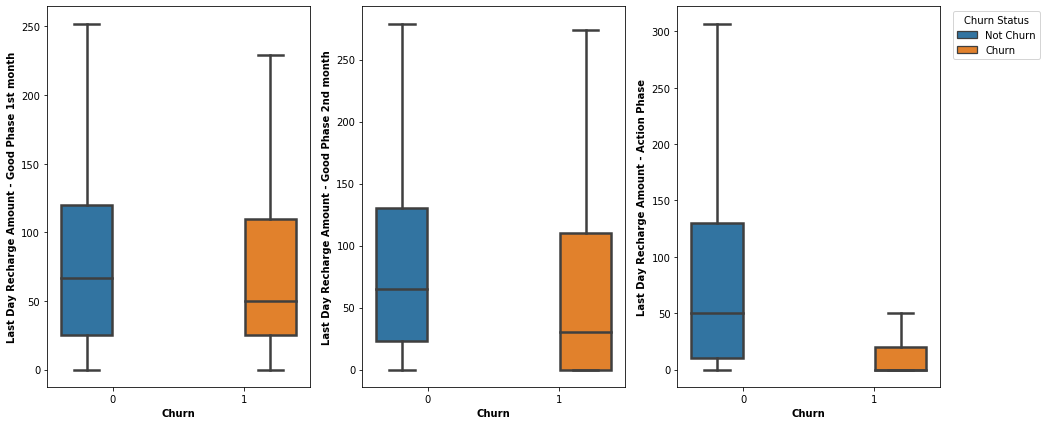

In [33]:
box_plot('last_day_rch_amt','Last Day Recharge Amount')

As per the trend that we have observed so far, the last day recharge amount drops for the action phase as well.

In [34]:
# Deriving good phase features for the last day recharge amount
telecom_churn_data['last_day_rch_amt_good_phase'] = (telecom_churn_data.last_day_rch_amt_6 + telecom_churn_data.last_day_rch_amt_6)/2

# dropping the original variables
telecom_churn_data.drop(['last_day_rch_amt_6','last_day_rch_amt_7'],axis=1,inplace=True)

#### Other recharge related columns - Total Recharge Num and Max Recharge done for Data

In [35]:
# Similarly deriving good phase feature for total recharge number
telecom_churn_data['rech_num_good_phase'] = (telecom_churn_data.total_rech_num_6 + telecom_churn_data.total_rech_num_7)/2

# dropping the original variables
telecom_churn_data.drop(['total_rech_num_6','total_rech_num_7'],axis=1,inplace=True)

In [36]:
# Max recharge for data columns have null values, treating null values first
# checking null values %age
max_rech_null = col_wise_null(telecom_churn_data[['max_rech_data_6','max_rech_data_7','max_rech_data_8']])
max_rech_null

,column_name,percent_missing
0,max_rech_data_6,44.149
1,max_rech_data_7,43.145
2,max_rech_data_8,46.825


In [37]:
# describing the columns
telecom_churn_data[['max_rech_data_6','max_rech_data_7','max_rech_data_8']].describe()

,max_rech_data_6,max_rech_data_7,max_rech_data_8
count,16756.000,17057.000,15953.000
mean,139.799,140.431,136.329
std,118.852,120.247,119.532
min,1.000,1.000,1.000
25%,25.000,25.000,25.000
50%,152.000,152.000,152.000
75%,198.000,198.000,198.000
max,1555.000,1555.000,1555.000


It can be seen that the minimum value is 1. This implies that the missing values are cases where no recharge was done. We can impute null values by 0 here.

In [38]:
telecom_churn_data[['max_rech_data_6','max_rech_data_7','max_rech_data_8']] = telecom_churn_data[['max_rech_data_6','max_rech_data_7','max_rech_data_8']].fillna(0)

In [39]:
# deriving good phase feature for max recharge amount for data
telecom_churn_data['max_rech_data_good_phase'] = (telecom_churn_data.max_rech_data_6 + telecom_churn_data.max_rech_data_7)/2

# dropping the original variables
telecom_churn_data.drop(['max_rech_data_6','max_rech_data_7'],axis=1,inplace=True)

#### Internet usage related columns

In [40]:
internet_cols = telecom_churn_data.columns[telecom_churn_data.columns.str.contains('2g|3g',regex=True)]

# checking the null value percentages for internet related columns

internet_col_nulls = col_wise_null(telecom_churn_data[internet_cols])
internet_col_nulls

,column_name,percent_missing
0,count_rech_2g_6,44.149
1,count_rech_2g_7,43.145
2,count_rech_2g_8,46.825
3,count_rech_3g_6,44.149
4,count_rech_3g_7,43.145
5,count_rech_3g_8,46.825
6,vol_2g_mb_6,0.000
7,vol_2g_mb_7,0.000
8,vol_2g_mb_8,0.000
9,vol_3g_mb_6,0.000


More than 40% of values are null for arpu_2g/3g columns and count_rech_2g/3g columns. These can be dropped since we have volume based usage for 2g and 3g both.

In [41]:
telecom_churn_data.drop(['count_rech_2g_6','count_rech_2g_7',
              'count_rech_2g_8','count_rech_3g_6','count_rech_3g_7','count_rech_3g_8'
               ,'arpu_3g_6','arpu_3g_7','arpu_3g_8','arpu_2g_6','arpu_2g_7','arpu_2g_8'],axis=1,inplace=True)

#### Volume based usage columns

In [42]:
vol_cols = telecom_churn_data.columns[telecom_churn_data.columns.str.contains('vol')]

vol_by_churn = pd.DataFrame(telecom_churn_data.groupby('churn',as_index=False)[vol_cols].mean())
vol_by_churn

,churn,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8
0,0,127.831,128.229,113.243,349.825,383.548,374.885
1,1,111.749,89.736,23.153,281.408,219.451,87.400


It can be seen that the volume based usage decreases from the good phase to action phase for both, 2G and 3G usage. Plotting this to see the trend.

<Figure size 1152x504 with 0 Axes>

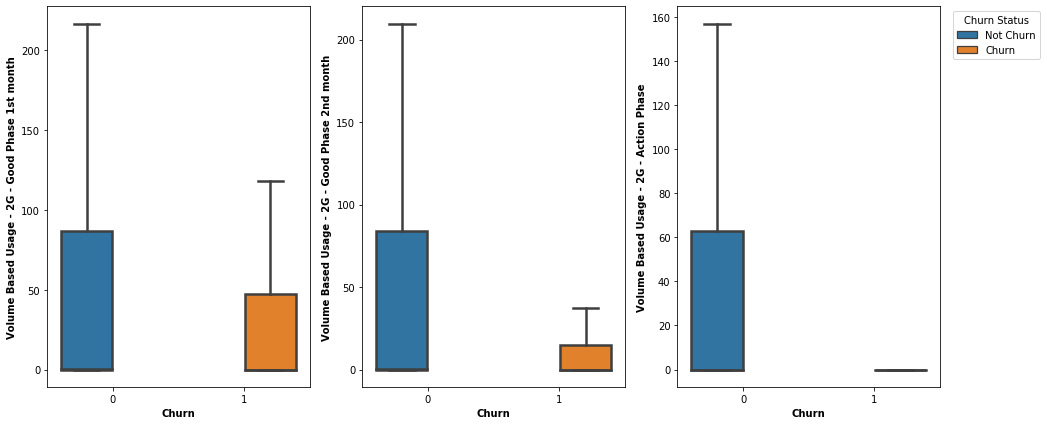

<Figure size 1152x504 with 0 Axes>

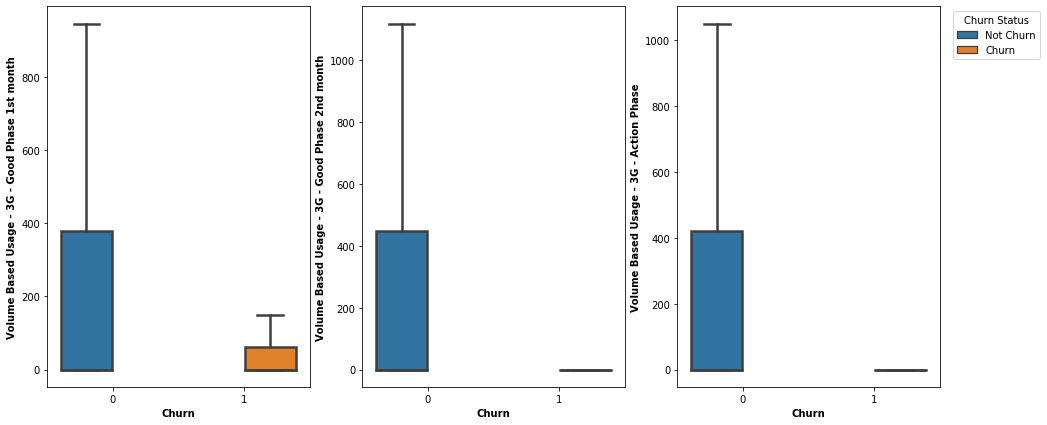

In [43]:
box_plot('vol_2g_mb', 'Volume Based Usage - 2G')
box_plot('vol_3g_mb', 'Volume Based Usage - 3G')

In [44]:
# Since the trend is similar for 2G and 3G, We can combine these columns and derive a cumutative volume based usage (2g and 3g both)
# Also, the features from 6th month and 7th month can be combined to derive good phase features
telecom_churn_data['vol_mb_8'] = telecom_churn_data['vol_2g_mb_8']+telecom_churn_data['vol_3g_mb_8']

telecom_churn_data['vol_mb_good_phase'] = (telecom_churn_data['vol_2g_mb_6']+telecom_churn_data['vol_3g_mb_6']+telecom_churn_data['vol_2g_mb_7']+telecom_churn_data['vol_3g_mb_7'])/2

# dropping the original columns
telecom_churn_data.drop(vol_cols,axis=1,inplace=True)

#### Volume based cost

In [45]:
vbc_cols = telecom_churn_data.columns[telecom_churn_data.columns.str.contains('vbc')]
vbc_by_churn = pd.DataFrame(telecom_churn_data.groupby('churn',as_index=False)[vbc_cols].mean()).reindex(columns=['churn','vbc_3g_6','vbc_3g_7','vbc_3g_8'])
vbc_by_churn

,churn,vbc_3g_6,vbc_3g_7,vbc_3g_8
0,0,162.370,186.206,180.501
1,1,115.097,96.076,40.852


The trend is similar to other usage related features. The usage decreased in the action phase.

In [46]:
# deriving good phase feature for vbc columns
telecom_churn_data['vbc_3g_good_phase'] = (telecom_churn_data['vbc_3g_6']+telecom_churn_data['vbc_3g_7'])/2

# dropping original columns
telecom_churn_data.drop(['vbc_3g_6','vbc_3g_7'],axis=1,inplace=True)

#### Monthly internet usages

In [47]:
monthly_cols = telecom_churn_data.columns[telecom_churn_data.columns.str.contains('monthly')]
monthly_usage_by_churn = pd.DataFrame(telecom_churn_data.groupby('churn',as_index=False)[monthly_cols].mean())
monthly_usage_by_churn

,churn,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8
0,0,0.182,0.193,0.165,0.220,0.237,0.225
1,1,0.093,0.071,0.023,0.197,0.144,0.057


The average monthly usage decreased for the action phase for both, 2G and 3G services.

In [48]:
# deriving new combined feature for monthly services
telecom_churn_data['monthly_2g3g_8'] = telecom_churn_data['monthly_2g_8']+telecom_churn_data['monthly_3g_8']

telecom_churn_data['monthly_2g3g_good_phase'] = (telecom_churn_data['monthly_2g_6']+telecom_churn_data['monthly_2g_7']+telecom_churn_data['monthly_3g_6']+telecom_churn_data['monthly_3g_7'])/2

# dropping the original columns
telecom_churn_data.drop(monthly_cols,axis=1,inplace=True)

#### Sachet recharges

In [49]:
sachet_cols = telecom_churn_data.columns[telecom_churn_data.columns.str.contains('sachet')]
sachet_by_churn = pd.DataFrame(telecom_churn_data.groupby('churn',as_index=False)[sachet_cols].mean())
sachet_by_churn

,churn,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8
0,0,1.069,1.244,1.124,0.206,0.228,0.215
1,1,1.029,0.878,0.270,0.244,0.221,0.065


In [50]:
# we can derive good phase features and combine 2g/3g since both of them follow a decreasing trend
telecom_churn_data['sachet_2g3g_8'] = telecom_churn_data['sachet_2g_8']+telecom_churn_data['sachet_3g_8']

telecom_churn_data['sachet_2g3g_good_phase'] = (telecom_churn_data['sachet_2g_6']+telecom_churn_data['sachet_2g_7']+telecom_churn_data['sachet_3g_6']+telecom_churn_data['sachet_3g_7'])/2

# dropping the original columns
telecom_churn_data.drop(sachet_cols,axis=1,inplace=True)

#### AON (Age on network)

In [51]:
# Converting the age on network to months
telecom_churn_data['aon'] = telecom_churn_data['aon']/30
# Describing the column
telecom_churn_data.aon.describe()

count   30001.000
mean       40.312
std        31.923
min         6.000
25%        15.333
50%        28.200
75%        58.533
max       144.033
Name: aon, dtype: float64

- **Minimun** is 6 months.

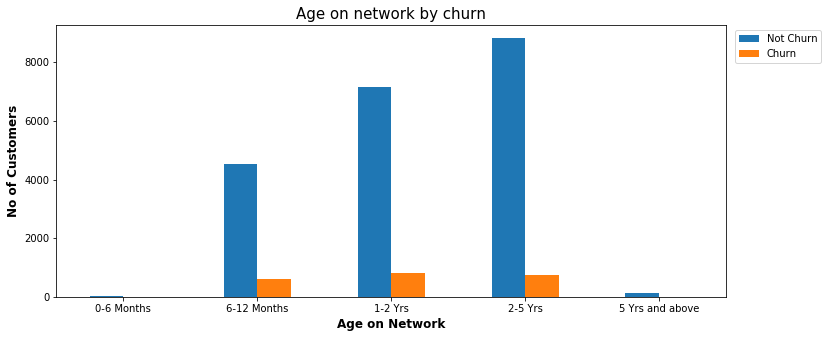

In [52]:
# Plotting the age on network by churn
aon_bins = [0, 6, 12, 24, 60, 61]
aon_labels = [ '0-6 Months', '6-12 Months', '1-2 Yrs', '2-5 Yrs', '5 Yrs and above']
telecom_churn_data['aon_bin'] = pd.cut(telecom_churn_data['aon'], aon_bins, labels=aon_labels)

aon_group = telecom_churn_data.groupby(['aon_bin','churn'])
aon_df = pd.DataFrame(aon_group.aon.count()).unstack()

aon_plot = aon_df.plot(kind='bar',title="Age on network by churn",figsize=(12,5),rot=0)
aon_plot.title.set_size(15)
aon_plot.legend(['Not Churn','Churn'],bbox_to_anchor=(1.15, 1))
aon_plot.set_xlabel("Age on Network",fontsize=12,fontweight='bold')
aon_plot.set_ylabel("No of Customers",fontsize=12,fontweight='bold')
telecom_churn_data.drop('aon_bin',axis=1,inplace=True)

- %age of customers who churn is highest for those who have been with the network for 6-12 months
- The number of customers who churn is the highest for customers who have been with the network for 1-2 yrs

#### ARPU - Average revenue per user

In [53]:
arpu_cols = telecom_churn_data.columns[telecom_churn_data.columns.str.contains('arpu')]
arpu_by_churn = pd.DataFrame(telecom_churn_data.groupby('churn',as_index=False)[arpu_cols].mean())
arpu_by_churn

,churn,arpu_6,arpu_7,arpu_8
0,0,549.220,562.608,532.636
1,1,663.158,540.166,237.201


The average revenue per user for the customers who churned drops drastically for the action month

<Figure size 1152x504 with 0 Axes>

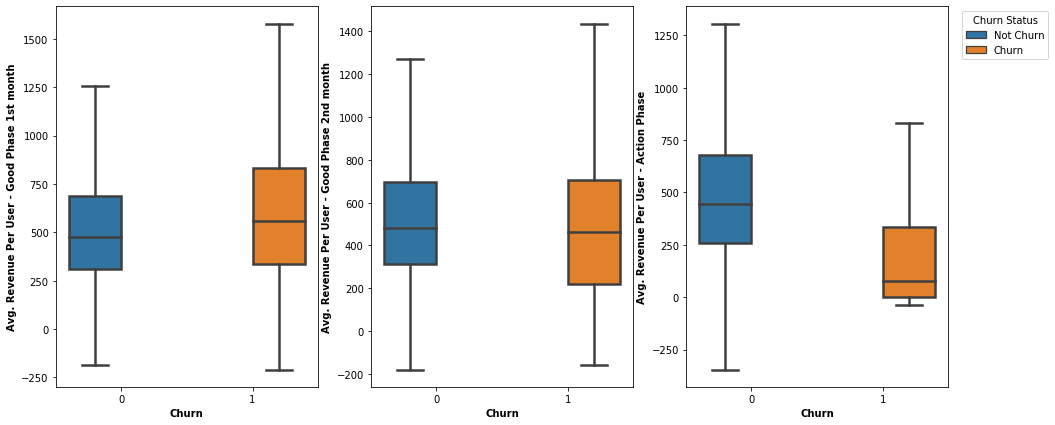

In [54]:
box_plot('arpu', 'Avg. Revenue Per User')

In [55]:
# deriving good phase features for arpu
telecom_churn_data['arpu_good_phase'] = (telecom_churn_data['arpu_6']+telecom_churn_data['arpu_7'])/2

# dropping original columns
telecom_churn_data.drop(['arpu_6','arpu_7'],axis=1,inplace=True)

#### Minutes of Usage related columns

In [56]:
mou_cols = telecom_churn_data.columns[telecom_churn_data.columns.str.contains('mou')]
mou_cols

Index(['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6',
       'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7',
       'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8',
       'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
       'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8',
       'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
       'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8',
       'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6',
       'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6',
       'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6',
       'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7',
       'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8',
       'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'total_og_mou_6',
       'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2t_mou_6',
       'loc_ic_t2t_mo

In [57]:
# checking the null value %ages for these columns
mou_nulls = col_wise_null(telecom_churn_data[mou_cols])
mou_nulls.sort_values(by='percent_missing',ascending=False)

,column_name,percent_missing
80,isd_ic_mou_8,3.913
50,loc_ic_t2t_mou_8,3.913
53,loc_ic_t2m_mou_8,3.913
29,std_og_t2t_mou_8,3.913
23,loc_og_t2c_mou_8,3.913
56,loc_ic_t2f_mou_8,3.913
20,loc_og_t2f_mou_8,3.913
59,loc_ic_mou_8,3.913
38,std_og_mou_8,3.913
17,loc_og_t2m_mou_8,3.913


The null value %age for these colums ranges from 1.79 to 3.9%. Also, the columns with total values of incoming and outgoing calls do not have any null values. It implies that for the mou columns, a null value means that the corresponding service was not used at all by the customer. It can be imputed with 0.

In [58]:
telecom_churn_data[mou_cols] = telecom_churn_data[mou_cols].fillna(0)

It can be seen that the following relationship holds for the outgoing and incoming usage related columns

* total_og_mou = loc_og_mou + std_og_mou + spl_og_mou + isd_og_mou + roam_og_mou + og_others
* std_og_mou = std_og_t2m_mou + std_og_t2t_mou + std_og_t2f_mou + std_og_2tc_mou
* loc_og_mou = loc_og_t2m_mou + loc_og_t2t_mou + loc_og_t2f_mou + loc_og_2tc_mou
* total_ic_mou = loc_ic_mou + std_ic_mou + roam_ic_mou + isd_ic_mou + spl_ic_mou + ic_others
* loc_ic_mou = loc_ic_t2t_mou + loc_ic_t2m_mou+loc_ic_t2f_mou+loc_ic_t2c_mou
* std_ic_mou = std_ic_t2t_mou + std_ic_t2m_mou + std_ic_t2f_mou+std_ic_t2c_mou

We can drop the composite columns. But first we'll validate it for just one month to make sure.

In [59]:
ic_og_composite_cols = telecom_churn_data.columns[telecom_churn_data.columns.str.contains('total_og_mou|total_ic_mou|std_og_mou|std_ic_mou|loc_og_mou|loc_ic_mou')]
telecom_churn_data.drop(ic_og_composite_cols,axis=1,inplace=True)

In [60]:
# Deriving good phase features for mou columns

# outgoing minutes of usage
telecom_churn_data['spl_og_mou_good_phase'] = (telecom_churn_data.spl_og_mou_6 + telecom_churn_data.spl_og_mou_7)/2
telecom_churn_data['isd_og_mou_good_phase'] = (telecom_churn_data.isd_og_mou_6 + telecom_churn_data.isd_og_mou_7)/2
telecom_churn_data['roam_og_mou_good_phase'] = (telecom_churn_data.roam_og_mou_6 + telecom_churn_data.roam_og_mou_7)/2

telecom_churn_data['std_og_t2m_mou_good_phase'] = (telecom_churn_data.std_og_t2m_mou_6 + telecom_churn_data.std_og_t2m_mou_7)/2
telecom_churn_data['std_og_t2t_mou_good_phase'] = (telecom_churn_data.std_og_t2t_mou_6 + telecom_churn_data.std_og_t2t_mou_7)/2
telecom_churn_data['std_og_t2f_mou_good_phase'] = (telecom_churn_data.std_og_t2f_mou_6 + telecom_churn_data.std_og_t2f_mou_7)/2

telecom_churn_data['loc_og_t2m_mou_good_phase'] = (telecom_churn_data.loc_og_t2m_mou_6 + telecom_churn_data.loc_og_t2m_mou_7)/2
telecom_churn_data['loc_og_t2t_mou_good_phase'] = (telecom_churn_data.loc_og_t2t_mou_6 + telecom_churn_data.loc_og_t2t_mou_7)/2
telecom_churn_data['loc_og_t2f_mou_good_phase'] = (telecom_churn_data.loc_og_t2f_mou_6 + telecom_churn_data.loc_og_t2f_mou_7)/2
telecom_churn_data['loc_og_t2c_mou_good_phase'] = (telecom_churn_data.loc_og_t2c_mou_6 + telecom_churn_data.loc_og_t2c_mou_7)/2

telecom_churn_data['spl_ic_mou_good_phase'] = (telecom_churn_data.spl_ic_mou_6 + telecom_churn_data.spl_ic_mou_7)/2
telecom_churn_data['isd_ic_mou_good_phase'] = (telecom_churn_data.isd_ic_mou_6 + telecom_churn_data.isd_ic_mou_7)/2
telecom_churn_data['roam_ic_mou_good_phase'] = (telecom_churn_data.roam_ic_mou_6 + telecom_churn_data.roam_ic_mou_7)/2

telecom_churn_data['std_ic_t2m_mou_good_phase'] = (telecom_churn_data.std_ic_t2m_mou_6 + telecom_churn_data.std_ic_t2m_mou_7)/2
telecom_churn_data['std_ic_t2t_mou_good_phase'] = (telecom_churn_data.std_ic_t2t_mou_6 + telecom_churn_data.std_ic_t2t_mou_7)/2
telecom_churn_data['std_ic_t2f_mou_good_phase'] = (telecom_churn_data.std_ic_t2f_mou_6 + telecom_churn_data.std_ic_t2f_mou_7)/2

telecom_churn_data['loc_ic_t2m_mou_good_phase'] = (telecom_churn_data.loc_ic_t2m_mou_6 + telecom_churn_data.loc_ic_t2m_mou_7)/2
telecom_churn_data['loc_ic_t2t_mou_good_phase'] = (telecom_churn_data.loc_ic_t2t_mou_6 + telecom_churn_data.loc_ic_t2t_mou_7)/2
telecom_churn_data['loc_ic_t2f_mou_good_phase'] = (telecom_churn_data.loc_ic_t2f_mou_6 + telecom_churn_data.loc_ic_t2f_mou_7)/2

# dropping incoming and outgoing mou columns for 6th and 7th month
mou6_7_cols = telecom_churn_data.columns[telecom_churn_data.columns.str.contains('.*_ic_.*mou_6|.*_ic_.*mou_7|.*_og_.*mou_6|.*_og_.*mou_7',regex=True)]
telecom_churn_data.drop(mou6_7_cols,axis=1,inplace=True)

#### On-net and Off-net usage

In [61]:
on_off_net_cols = telecom_churn_data.columns[telecom_churn_data.columns.str.contains('onnet|offnet')]
on_off_net_cols

Index(['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6',
       'offnet_mou_7', 'offnet_mou_8'],
      dtype='object')

In [62]:
on_off_mou_by_churn = pd.DataFrame(telecom_churn_data.groupby('churn',as_index=False)[on_off_net_cols].mean())
on_off_mou_by_churn

,churn,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8
0,0,251.204,265.641,244.819,365.046,377.810,352.510
1,1,369.058,292.408,113.227,471.331,381.416,138.249


It can be observed that onnet and offnet, both the usages drop significantly for the action month. Plotting the spread of these features.

<Figure size 1152x504 with 0 Axes>

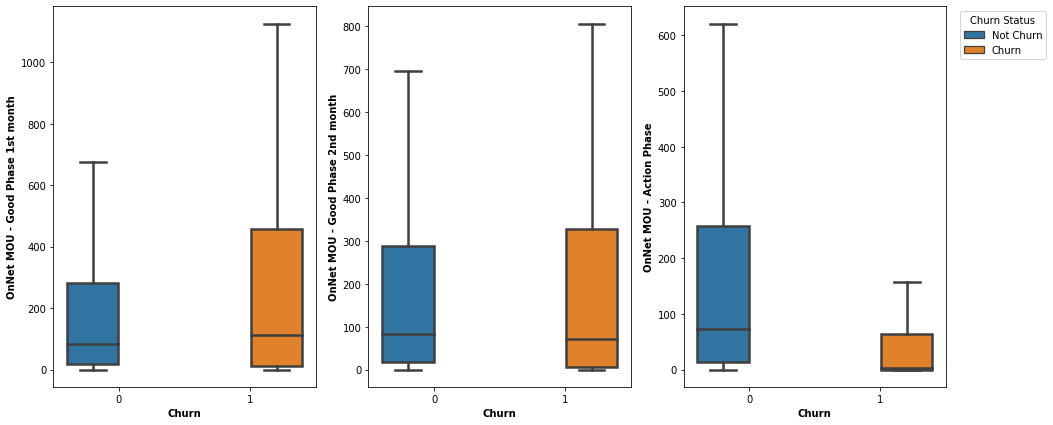

<Figure size 1152x504 with 0 Axes>

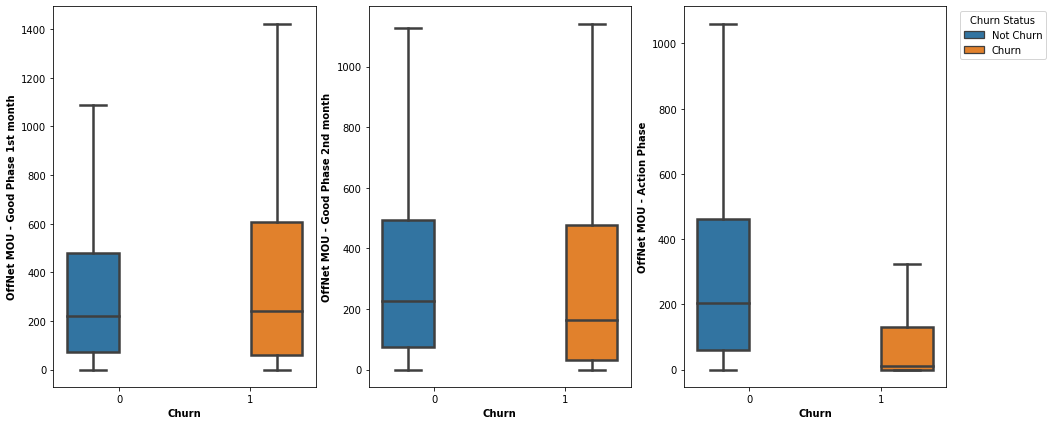

In [63]:
box_plot('onnet_mou','OnNet MOU')
box_plot('offnet_mou','OffNet MOU')

In [64]:
# Deriving good phase features for onnet_mou and offnet_mou
telecom_churn_data['onnet_mou_good_phase'] = (telecom_churn_data.onnet_mou_6+telecom_churn_data.onnet_mou_7)/2
telecom_churn_data['offnet_mou_good_phase'] = (telecom_churn_data.offnet_mou_6+telecom_churn_data.offnet_mou_7)/2

#dropping the original columns
telecom_churn_data.drop(['onnet_mou_6', 'onnet_mou_7', 'offnet_mou_6', 'offnet_mou_7'],axis=1,inplace=True)

#### Outgoing and Incoming others columns

In [65]:
og_ic_others = telecom_churn_data.columns[telecom_churn_data.columns.str.contains('others')]

# Describing these columns
telecom_churn_data[og_ic_others].describe(percentiles=[.25,.5,.75,.9])

,og_others_6,og_others_7,og_others_8,ic_others_6,ic_others_7,ic_others_8
count,29456.000,29464.000,28827.000,29456.000,29464.000,28827.000
mean,0.673,0.044,0.060,1.175,1.528,1.274
std,4.145,2.701,3.382,14.114,16.141,13.039
min,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.000,0.000,0.000,0.000,0.000,0.000
50%,0.000,0.000,0.000,0.000,0.000,0.000
75%,0.000,0.000,0.000,0.060,0.000,0.060
90%,2.100,0.000,0.000,1.110,1.530,1.240
max,609.810,370.130,394.930,1344.140,1495.940,1209.860


Most of the values for these columns are 0 (or outliers). Dropping these columns

In [66]:
telecom_churn_data.drop(og_ic_others,axis=1,inplace=True)

#### Date Related columns

In [67]:
# First converting the date columns to proper format

date_columns = telecom_churn_data.columns[telecom_churn_data.columns.str.contains('date')]

for date_col in list(date_columns):
    telecom_churn_data[date_col]= pd.to_datetime(telecom_churn_data[date_col])
date_columns

Index(['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
       'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8'],
      dtype='object')

In [68]:
# checking the null value %ages for date columns
missing_dates = col_wise_null(telecom_churn_data[date_columns])
missing_dates

,column_name,percent_missing
0,date_of_last_rech_6,0.243
1,date_of_last_rech_7,0.327
2,date_of_last_rech_8,1.943
3,date_of_last_rech_data_6,44.149
4,date_of_last_rech_data_7,43.145
5,date_of_last_rech_data_8,46.825


We can drop the date_of_last_rech_data colums since ~45% are null values for all the months

In [69]:
telecom_churn_data.drop(['date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8'],axis=1,inplace=True)

In [70]:
# The date of last recharge columns can be used to derive the number of days left till the end of the month.

import datetime
last_date_of_month_6 = datetime.datetime.strptime("30-06-2014", "%d-%m-%Y")
last_date_of_month_7 = datetime.datetime.strptime("31-07-2014", "%d-%m-%Y")
last_date_of_month_8 = datetime.datetime.strptime("31-08-2014", "%d-%m-%Y")

telecom_churn_data["rech_days_left_6"]      = (last_date_of_month_6 - telecom_churn_data.date_of_last_rech_6).astype('timedelta64[D]')
telecom_churn_data["rech_days_left_7"]      = (last_date_of_month_7 - telecom_churn_data.date_of_last_rech_7).astype('timedelta64[D]')
telecom_churn_data["rech_days_left_8"]      = (last_date_of_month_8 - telecom_churn_data.date_of_last_rech_8).astype('timedelta64[D]')

telecom_churn_data.drop(["date_of_last_rech_6",  "date_of_last_rech_7", "date_of_last_rech_8"], axis=1, inplace=True)

In [71]:
# checking the null values for these columns
rech_day_left_nulls = col_wise_null(telecom_churn_data[['rech_days_left_6','rech_days_left_7','rech_days_left_8']])
rech_day_left_nulls

,column_name,percent_missing
0,rech_days_left_6,0.243
1,rech_days_left_7,0.327
2,rech_days_left_8,1.943


In [72]:
# describing the derived rech_days_left features
telecom_churn_data[['rech_days_left_6','rech_days_left_7','rech_days_left_8']].describe()

,rech_days_left_6,rech_days_left_7,rech_days_left_8
count,29928.000,29903.000,29418.000
mean,3.537,3.730,4.312
std,4.673,4.588,5.271
min,0.000,0.000,0.000
25%,0.000,0.000,1.000
50%,2.000,2.000,3.000
75%,5.000,5.000,6.000
max,29.000,30.000,30.000


In [73]:
# Imputing with 0 won't be appropriate here, imputing with the meadian value
telecom_churn_data['rech_days_left_6'][np.isnan(telecom_churn_data['rech_days_left_6'])]  = telecom_churn_data['rech_days_left_6'].median()
telecom_churn_data['rech_days_left_7'][np.isnan(telecom_churn_data['rech_days_left_7'])]  = telecom_churn_data['rech_days_left_7'].median()
telecom_churn_data['rech_days_left_8'][np.isnan(telecom_churn_data['rech_days_left_8'])] = telecom_churn_data['rech_days_left_8'].median()

In [74]:
# deriving good phase features for rech_days_lest
telecom_churn_data['rech_days_left_good_phase'] = (telecom_churn_data.rech_days_left_6 + telecom_churn_data.rech_days_left_7)/2
# dropping the original features
telecom_churn_data.drop(['rech_days_left_6','rech_days_left_7'],axis=1,inplace=True)

#### Categorical columns

In [75]:
# There are two categorical columns
cat_cols = telecom_churn_data.columns[telecom_churn_data.columns.str.contains('night_pck_user|fb_user')]
for col in cat_cols:
    print(col)
    print(telecom_churn_data[col].unique())
    print('-'*20, '\n')

night_pck_user_6
[ 0. nan  1.]
-------------------- 

night_pck_user_7
[ 0. nan  1.]
-------------------- 

night_pck_user_8
[ 0. nan  1.]
-------------------- 

fb_user_6
[ 1. nan  0.]
-------------------- 

fb_user_7
[ 1. nan  0.]
-------------------- 

fb_user_8
[ 1. nan  0.]
-------------------- 



It can be seen that there are only two unique values, 1 and 0.<br/>
Also, the null value %age of arpu_3g/2g data is equal to the corresponding month's night_pck_user and fb_user null value %ages. It implies that these customers are not using internet at all and hence are neither a night pack user nor a fb user. Null values can be imputed with 0 here.

In [76]:
telecom_churn_data[cat_cols] = telecom_churn_data[cat_cols].fillna(value=0)

#### Night Pack users

In [77]:
night_pck_usr_by_churn = pd.DataFrame(telecom_churn_data.groupby('churn',as_index=False)['night_pck_user_6','night_pck_user_7','night_pck_user_8'].sum())
night_pck_usr_by_churn

,churn,night_pck_user_6,night_pck_user_7,night_pck_user_8
0,0,369.000,352.000,332.000
1,1,38.000,23.000,9.000


We see a drop in the night pack users from good phase to action phase.

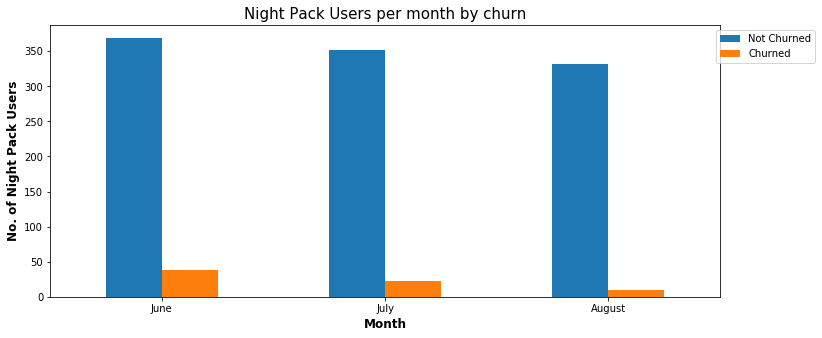

In [78]:
night_pck_usr_plot = night_pck_usr_by_churn[['night_pck_user_6','night_pck_user_7','night_pck_user_8']].T.reset_index(drop=True).plot(kind='bar',title="Night Pack Users per month by churn",figsize=(12,5),rot=0)
_ = night_pck_usr_plot.title.set_size(15)
_ = night_pck_usr_plot.legend(['Not Churned','Churned'],bbox_to_anchor=(1.15, 1))
_ = night_pck_usr_plot.set_xticklabels(['June','July','August'])
_ = night_pck_usr_plot.set_xlabel("Month",fontsize=12,fontweight='bold')
_ = night_pck_usr_plot.set_ylabel("No. of Night Pack Users",fontsize=12,fontweight='bold')

Although we see a decreasing trend in night pack users for the customers who churned, this number is a very small %age of the whole data. Of the total 2441 customers that churned, an insignifant number of users are night pack users. The columns overall don't have much variance. We can drop these columns.

In [79]:
telecom_churn_data.drop(['night_pck_user_6','night_pck_user_7','night_pck_user_8'], axis=1, inplace=True)

#### FB Users

In [80]:
# A similar analysis can be done for FB User
fb_usr_by_churn = pd.DataFrame(telecom_churn_data.groupby('churn',as_index=False)['fb_user_6','fb_user_7','fb_user_8'].sum())
fb_usr_by_churn

,churn,fb_user_6,fb_user_7,fb_user_8
0,0,14487.000,14855.000,13965.000
1,1,1038.000,867.000,348.000


It can be seen that the number of fb users also drop drastically from good phase to action phase.

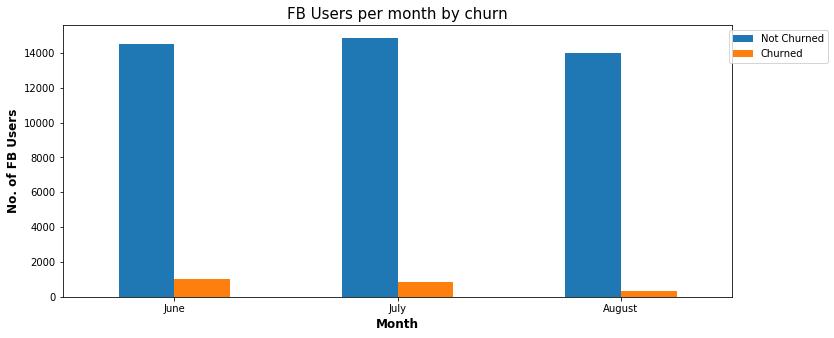

In [81]:
fb_usr_plot = fb_usr_by_churn[['fb_user_6','fb_user_7','fb_user_8']].T.reset_index(drop=True).plot(kind='bar',title="FB Users per month by churn",figsize=(12,5),rot=0)
_ = fb_usr_plot.title.set_size(15)
_ = fb_usr_plot.legend(['Not Churned','Churned'],bbox_to_anchor=(1.15, 1))
_ = fb_usr_plot.set_xticklabels(['June','July','August'])
_ = fb_usr_plot.set_xlabel("Month",fontsize=12,fontweight='bold')
_ = fb_usr_plot.set_ylabel("No. of FB Users",fontsize=12,fontweight='bold')

There is a clear decreasing trend in the number of FB users for the customers who churned. It dropped to 14.25% in the action phase from 42.52% in the action phase first month.

In [82]:
# Deriving good phase feature for fb_users. We'll 'OR' the value of the 6th month and the 7th month to do that.
def fb_user(x,y):
    if x+y > 0:
        return 1
    else:
        return 0
    
telecom_churn_data['fb_user_good_phase'] = telecom_churn_data.fb_user_6+telecom_churn_data.fb_user_7
telecom_churn_data['fb_user_good_phase'] = telecom_churn_data['fb_user_good_phase'].apply(lambda x : 1 if x > 0 else 0)
# dropping the original columns
telecom_churn_data.drop(['fb_user_6','fb_user_7'],axis=1,inplace=True)

In [83]:
# checking the null values for the whole data set now.
missing_value_df = col_wise_null(telecom_churn_data)
missing_value_df[missing_value_df.percent_missing > 0]

,column_name,percent_missing


There are no missing values now.

In [84]:
# renaming some columns for consistency
telecom_churn_data.rename(columns={'total_rech_amt_8':'rech_amt_8','total_rech_data_amt_8':'rech_amt_data_8','total_rech_num_8':'rech_num_8'}, inplace=True)

In [85]:
# reindexing columns for better comprehension
telecom_churn_data = telecom_churn_data.reindex(columns=['aon','arpu_good_phase','arpu_8','rech_amt_good_phase','rech_amt_8','rech_amt_data_good_phase','rech_amt_data_8','rech_num_good_phase','rech_num_8','last_day_rch_amt_good_phase','last_day_rch_amt_8','max_rech_amt_good_phase','max_rech_amt_8','max_rech_data_good_phase','max_rech_data_8','rech_days_left_good_phase','rech_days_left_8','isd_ic_mou_good_phase','isd_ic_mou_8','isd_og_mou_good_phase','isd_og_mou_8','loc_ic_t2f_mou_good_phase','loc_ic_t2f_mou_8','loc_ic_t2m_mou_good_phase','loc_ic_t2m_mou_8','loc_ic_t2t_mou_good_phase','loc_ic_t2t_mou_8','loc_og_t2c_mou_good_phase','loc_og_t2c_mou_8','loc_og_t2f_mou_good_phase','loc_og_t2f_mou_8','loc_og_t2m_mou_good_phase','loc_og_t2m_mou_8','loc_og_t2t_mou_good_phase','loc_og_t2t_mou_8','spl_ic_mou_good_phase','spl_ic_mou_8','spl_og_mou_good_phase','spl_og_mou_8','std_ic_t2f_mou_good_phase','std_ic_t2f_mou_8','std_ic_t2m_mou_good_phase','std_ic_t2m_mou_8','std_ic_t2t_mou_good_phase','std_ic_t2t_mou_8','std_og_t2f_mou_good_phase','std_og_t2f_mou_8','std_og_t2m_mou_good_phase','std_og_t2m_mou_8','std_og_t2t_mou_good_phase','std_og_t2t_mou_8','roam_ic_mou_good_phase','roam_ic_mou_8','roam_og_mou_good_phase','roam_og_mou_8','offnet_mou_good_phase','offnet_mou_8','onnet_mou_good_phase','onnet_mou_8','monthly_2g3g_good_phase','monthly_2g3g_8','sachet_2g3g_good_phase','sachet_2g3g_8','vbc_3g_good_phase','vbc_3g_8','vol_mb_good_phase','vol_mb_8','fb_user_good_phase','fb_user_8','churn'])

In [86]:
print("The shape of the dataset now is {}".format(telecom_churn_data.shape))

The shape of the dataset now is (30001, 70)


In [87]:
# Creating a savepoint here
telecom_churn_data_bkp1 = telecom_churn_data.copy()

### Shift Analysis

Now that we have feature values for the good phase and the action phase, we can calculate how the usage values shift.

In [88]:
shift_cols = ['arpu','rech_amt','rech_amt_data','rech_num','last_day_rch_amt','max_rech_amt','max_rech_data','rech_days_left','isd_ic_mou','isd_og_mou','loc_ic_t2f_mou','loc_ic_t2m_mou','loc_ic_t2t_mou','loc_og_t2c_mou','loc_og_t2f_mou','loc_og_t2m_mou','loc_og_t2t_mou','spl_ic_mou','spl_og_mou','std_ic_t2f_mou','std_ic_t2m_mou','std_ic_t2t_mou','std_og_t2f_mou','std_og_t2m_mou','std_og_t2t_mou','roam_ic_mou','roam_og_mou','offnet_mou','onnet_mou','monthly_2g3g','sachet_2g3g','vbc_3g','vol_mb']

In [89]:
shift_df = pd.DataFrame()
for col in shift_cols:
    col_g_p = col+"_good_phase"
    col_8 = col+"_8"
    col_shift = col+"_shift"
    shift_df[col_shift] = telecom_churn_data[col_8]-telecom_churn_data[col_g_p]
shift_df['churn']=telecom_churn_data['churn']

In [90]:
shift_df.groupby('churn').mean()

,arpu_shift,rech_amt_shift,rech_amt_data_shift,rech_num_shift,last_day_rch_amt_shift,max_rech_amt_shift,max_rech_data_shift,rech_days_left_shift,isd_ic_mou_shift,isd_og_mou_shift,loc_ic_t2f_mou_shift,loc_ic_t2m_mou_shift,loc_ic_t2t_mou_shift,loc_og_t2c_mou_shift,loc_og_t2f_mou_shift,loc_og_t2m_mou_shift,loc_og_t2t_mou_shift,spl_ic_mou_shift,spl_og_mou_shift,std_ic_t2f_mou_shift,std_ic_t2m_mou_shift,std_ic_t2t_mou_shift,std_og_t2f_mou_shift,std_og_t2m_mou_shift,std_og_t2t_mou_shift,roam_ic_mou_shift,roam_og_mou_shift,offnet_mou_shift,onnet_mou_shift,monthly_2g3g_shift,sachet_2g3g_shift,vbc_3g_shift,vol_mb_shift
churn,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,-23.279,-42.850,-5.681,-1.316,-3.170,-4.426,-3.744,0.490,0.269,0.014,-0.906,0.749,-1.144,0.051,-0.364,-6.299,-4.421,-0.012,0.505,-0.100,-0.550,-0.126,-0.178,-10.360,-7.711,-1.845,-3.157,-18.918,-13.603,-0.026,-0.035,6.213,-6.589
1,-364.461,-453.346,-289.238,-7.407,-68.676,-80.295,-37.219,2.551,-7.119,-2.494,-5.178,-67.285,-29.184,-0.884,-2.001,-68.618,-36.148,-0.033,-4.552,-1.145,-19.435,-13.874,-0.822,-206.604,-178.640,-2.227,-7.328,-288.125,-217.506,-0.173,-0.851,-64.734,-240.619


It can be seen that the average shift in usage values has a decreasing trend stronger for the customers who churned.

### Outlier treatment

In [91]:
# capping the outliers of the numerical columns with k-sigma technique using k=3

numeric_cols = telecom_churn_data.columns.drop(['churn','fb_user_good_phase','fb_user_8'])

for column in numeric_cols:
    mu = np.average(telecom_churn_data[column])
    sigma = np.std(telecom_churn_data[column])
    low = mu - 3*sigma
    high = mu + 3*sigma
    telecom_churn_data[column].clip(low, high, inplace=True)

In [92]:
telecom_churn_data.head()

,aon,arpu_good_phase,arpu_8,rech_amt_good_phase,rech_amt_8,rech_amt_data_good_phase,rech_amt_data_8,rech_num_good_phase,rech_num_8,last_day_rch_amt_good_phase,last_day_rch_amt_8,max_rech_amt_good_phase,max_rech_amt_8,max_rech_data_good_phase,max_rech_data_8,rech_days_left_good_phase,rech_days_left_8,isd_ic_mou_good_phase,isd_ic_mou_8,isd_og_mou_good_phase,isd_og_mou_8,loc_ic_t2f_mou_good_phase,loc_ic_t2f_mou_8,loc_ic_t2m_mou_good_phase,loc_ic_t2m_mou_8,loc_ic_t2t_mou_good_phase,loc_ic_t2t_mou_8,loc_og_t2c_mou_good_phase,loc_og_t2c_mou_8,loc_og_t2f_mou_good_phase,loc_og_t2f_mou_8,loc_og_t2m_mou_good_phase,loc_og_t2m_mou_8,loc_og_t2t_mou_good_phase,loc_og_t2t_mou_8,spl_ic_mou_good_phase,spl_ic_mou_8,spl_og_mou_good_phase,spl_og_mou_8,std_ic_t2f_mou_good_phase,std_ic_t2f_mou_8,std_ic_t2m_mou_good_phase,std_ic_t2m_mou_8,std_ic_t2t_mou_good_phase,std_ic_t2t_mou_8,std_og_t2f_mou_good_phase,std_og_t2f_mou_8,std_og_t2m_mou_good_phase,std_og_t2m_mou_8,std_og_t2t_mou_good_phase,std_og_t2t_mou_8,roam_ic_mou_good_phase,roam_ic_mou_8,roam_og_mou_good_phase,roam_og_mou_8,offnet_mou_good_phase,offnet_mou_8,onnet_mou_good_phase,onnet_mou_8,monthly_2g3g_good_phase,monthly_2g3g_8,sachet_2g3g_good_phase,sachet_2g3g_8,vbc_3g_good_phase,vbc_3g_8,vol_mb_good_phase,vol_mb_8,fb_user_good_phase,fb_user_8,churn
0,32.267,206.100,213.803,307.000,252.000,252.000,252.000,3.500,2.000,252.000,252.000,252.000,252.000,252.000,252.000,12.000,19.954,0.000,0.000,0.000,0.000,0.000,1.150,0.000,4.130,0.000,0.160,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,50.600,30.400,132.890,115.360,1,1.000,1
7,26.733,1209.515,2014.459,1185.000,2418.073,0.000,0.000,5.000,7.000,0.000,527.933,633.315,679.759,0.000,0.000,4.500,5.000,8.295,31.590,0.090,10.010,126.810,39.530,219.525,121.190,45.200,27.310,0.000,0.000,58.635,53.230,378.005,162.280,41.385,40.280,0.105,0.000,2.250,6.500,43.215,22.210,109.215,141.330,24.360,30.390,13.370,16.680,40.825,49.140,13.795,12.010,24.860,31.640,18.165,38.060,510.295,325.910,56.260,52.290,0.000,0.000,0.000,0.000,19.060,57.740,0.000,0.000,0,0.000,1
8,10.500,435.472,137.362,519.000,120.000,177.000,207.000,20.000,14.000,50.000,10.000,122.000,30.000,77.000,23.000,2.500,1.000,0.000,0.000,0.000,0.000,0.000,0.000,35.780,15.480,16.840,0.310,0.000,7.150,0.000,0.000,75.770,50.540,257.360,12.490,0.000,0.000,0.000,10.230,0.000,0.000,13.255,0.650,0.290,0.100,0.000,0.000,11.865,75.690,124.995,22.580,0.000,0.000,0.000,0.000,87.645,136.480,382.360,35.080,0.500,0.000,0.500,3.000,516.405,21.030,553.475,11.970,1,1.000,0
21,24.000,556.103,637.760,640.000,718.000,0.000,0.000,24.000,27.000,30.000,50.000,50.000,50.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,3.725,10.390,96.430,129.160,6.335,19.540,0.000,0.000,0.375,1.580,89.870,104.810,5.320,23.340,0.000,0.000,0.000,0.000,0.000,0.000,52.960,101.740,10.020,0.180,0.000,0.000,737.050,876.990,111.935,61.790,0.000,0.000,0.000,0.000,827.305,983.390,117.260,85.140,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0,0.000,0
23,20.133,134.124,366.966,227.000,439.000,356.000,540.000,4.000,4.000,0.000,0.000,89.500,179.000,89.500,179.000,14.662,7.000,14.115,3.740,0.005,0.000,0.000,0.710,104.635,146.840,40.875,76.640,0.000,17.710,0.000,0.000,82.975,148.560,49.810,33.580,0.000,0.000,0.050,17.710,0.000,0.000,8.660,43.910,0.255,13.380,0.000,0.000,4.355,39.610,0.000,0.000,0.000,0.000,0.000,0.000,87.385,205.890,49.810,33.580,1.000,1.000,0.000,1.000,25.930,40.450,299.785,1009.930,1,1.000,0


In [93]:
# Creating a savepoint here
telecom_churn_data_bkp2 = telecom_churn_data.copy()

### Model building

In [94]:
from sklearn.metrics import confusion_matrix,roc_auc_score,f1_score,accuracy_score,classification_report,precision_score, recall_score

# define function to calculate and print model metrics.
def metricsReport(x,y,prob):
    
    print('Overall Accuracy: '+ str(metrics.accuracy_score(x, y)))
    
    # Confusion matrix 
    confusion = metrics.confusion_matrix(x, y)
    print('Confusion Matrix: ')
    print(confusion)

    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives

    # Sensitivity
    print('Sensitivity: '+str(TP / float(TP+FN)))

    # Specificity
    print('Specificity: '+str(TN / float(TN+FP)))

    # Calculate False Postive Rate
    print('False Positive Rate: '+str(FP/ float(TN+FP)))

    # Positive Predictive Value 
    print('Positive Predictive Value: '+str(TP / float(TP+FP)))

    # Negative predictive value
    print('Negative Predictive Value: '+str(TN / float(TN+ FN)))

    #### Precision and Recall

    # Precision
    print('Precision: '+str(TP /(TP + FP)))

    # Recall
    print('Recall: '+str(TP / (TP + FN)))
    
    # AUC Score
    print('AUC Score: '+str(metrics.roc_auc_score( x, prob )))
    
# function for drawing ROC curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

In [95]:
X = telecom_churn_data.drop(['churn'],axis=1)
y = telecom_churn_data['churn']
X_cols = X.columns

In [96]:
# Train-Test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [97]:
# scaling the features
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

As seen earlier, only ~8% of customers churned. These is a class imbalance in the dataset. This will have to be treated.

In [98]:
print("X_train Shape {}".format(X_train.shape))

y_train_imb = (y_train != 0).sum()/(y_train == 0).sum()
print("Imbalance in Train Dataset: {}".format(round(y_train_imb,3)))

X_train Shape (21000, 69)
Imbalance in Train Dataset: 0.088


In [99]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=12, ratio = 1)
X_train, y_train = sm.fit_sample(X_train, y_train)

Using TensorFlow backend.


In [100]:
print("X_train Shape after SMOTE {}".format(X_train.shape))

y_train_imb = (y_train != 0).sum()/(y_train == 0).sum()
print("Imbalance in Train Dataset: {}".format(round(y_train_imb,3)))

X_train Shape after SMOTE (38618, 69)
Imbalance in Train Dataset: 1.0


Both the classes are equally represented in the dataset now.

#### PCA with Logistic Regression

In [101]:
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [102]:
X_train_pca = pca.fit_transform(X_train)
print(X_train_pca.shape)

X_test_pca = pca.transform(X_test)
print(X_test_pca.shape)

(38618, 69)
(9001, 69)


We will now perform logistic regression on the PCA modified train data.

In [103]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
log_reg_pca = LogisticRegression(C=1e9)
log_reg_pca.fit(X_train_pca, y_train)

# Prediction on test data
y_pred = log_reg_pca.predict(X_test_pca)

# predicted probabilities
y_pred_prob = log_reg_pca.predict_proba(X_test_pca)[:,1]

In [104]:
# Checking the performance of the logistic regression model with default pca.
metricsReport(y_test,y_pred,y_pred_prob)

Overall Accuracy: 0.8519053438506833
Confusion Matrix: 
[[7036 1215]
 [ 118  632]]
Sensitivity: 0.8426666666666667
Specificity: 0.8527451218034178
False Positive Rate: 0.14725487819658223
Positive Predictive Value: 0.3421765024363833
Negative Predictive Value: 0.9835057310595471
Precision: 0.3421765024363833
Recall: 0.8426666666666667
AUC Score: 0.9081544863248898


In [105]:
# Checking the principal components weights for the first few PC's
col = list(X_cols)
df_pca = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'PC3':pca.components_[2],'Feature':col})
df_pca.head(10)

,PC1,PC2,PC3,Feature
0,0.069,0.076,0.028,aon
1,0.272,-0.031,0.043,arpu_good_phase
2,0.298,0.099,-0.026,arpu_8
3,0.275,-0.035,0.054,rech_amt_good_phase
4,0.289,0.101,-0.029,rech_amt_8
5,-0.085,0.156,-0.071,rech_amt_data_good_phase
6,-0.005,0.138,-0.067,rech_amt_data_8
7,0.084,-0.137,-0.189,rech_num_good_phase
8,0.145,-0.019,-0.182,rech_num_8
9,0.085,0.094,0.160,last_day_rch_amt_good_phase


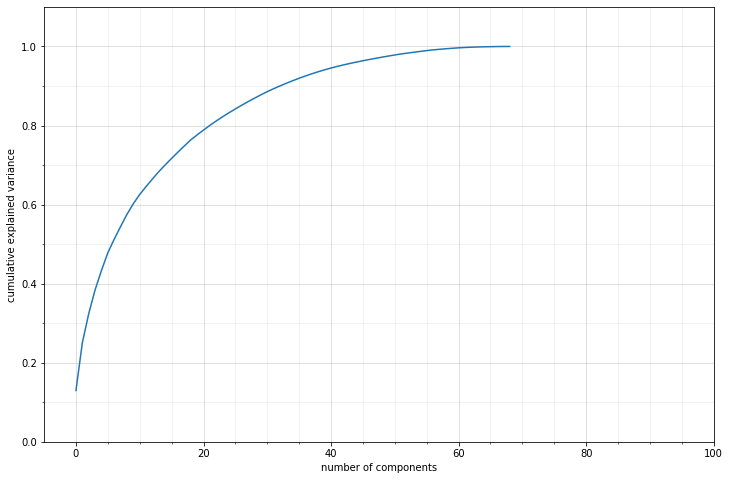

In [106]:
# Checking the cumulative variance explained by the principal components using a scree plot
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
ax = fig.add_subplot(1, 1, 1)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
# Major ticks every 20, minor ticks every 5
major_ticks = np.arange(0, 101, 20)
minor_ticks = np.arange(0, 101, 5)
minor_y_ticks = np.arange(0, 1, 0.1)
ax.set_xlim(-5, 100)
ax.set_ylim(0.1, 1.1)
ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)
ax.set_yticks(minor_y_ticks, minor=True)
# Or if you want different settings for the grids:
ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.5)
plt.show()

In [107]:
# From the above plot, it can be seen that ~40 PC's are enough to explain ~95% variance. Also, using incremental pca here.
from sklearn.decomposition import IncrementalPCA
pca_40 = PCA(n_components=40,svd_solver='randomized', random_state=42)

X_train_pca_40 = pca_40.fit_transform(X_train)

X_test_pca_40 = pca_40.transform(X_test)

In [108]:
log_reg_pca_40 = LogisticRegression(C=1e9)
log_reg_pca_40.fit(X_train_pca_40, y_train)

# Prediction on test data
y_pred_40 = log_reg_pca_40.predict(X_test_pca_40)

# predicted probabilities
y_pred_prob = log_reg_pca_40.predict_proba(X_test_pca_40)[:,1]

In [109]:
# Checking the performance of the logistic regression model with default pca.
metricsReport(y_test,y_pred_40,y_pred_prob)

Overall Accuracy: 0.8460171092100878
Confusion Matrix: 
[[6991 1260]
 [ 126  624]]
Sensitivity: 0.832
Specificity: 0.8472912374257666
False Positive Rate: 0.15270876257423344
Positive Predictive Value: 0.33121019108280253
Negative Predictive Value: 0.9822959111985388
Precision: 0.33121019108280253
Recall: 0.832
AUC Score: 0.902599119298671


We will now use gridsearchCV to tune the hyper-parameters for logistic regression

In [110]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, random_state = 42, shuffle = True)

# l1 lasso l2 ridge
grid = {'C': [0.1, 0.5, 1, 2, 5], "penalty":["l1","l2"]}

model= LogisticRegression()

# set up GridSearchCV()
model_cv = GridSearchCV(model, grid ,cv=5, scoring='accuracy', return_train_score= True, n_jobs=-1)      

# fit the model
model_cv.fit(X_train_pca_40, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [0.1, 0.5, 1, 2, 5], 'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='accuracy', verbose=0)

In [111]:
print("Best parameters ", model_cv.best_params_)
print("Accuracy :", model_cv.best_score_)

Best parameters  {'C': 2, 'penalty': 'l2'}
Accuracy : 0.8477393961365166


In [112]:
# Prediction on gridSearchCV tuned model

y_pred_tuned_40 = model_cv.predict(X_test_pca_40)

# predicted probabilities
y_pred_tuned_40_prob = log_reg_pca_40.predict_proba(X_test_pca_40)[:,1]

# prediction metrics
metricsReport(y_test,y_pred_tuned_40,y_pred_tuned_40_prob)

Overall Accuracy: 0.8460171092100878
Confusion Matrix: 
[[6991 1260]
 [ 126  624]]
Sensitivity: 0.832
Specificity: 0.8472912374257666
False Positive Rate: 0.15270876257423344
Positive Predictive Value: 0.33121019108280253
Negative Predictive Value: 0.9822959111985388
Precision: 0.33121019108280253
Recall: 0.832
AUC Score: 0.902599119298671


#### Random Forest Model

In [113]:
# Building a hyper-parameter tuned random forest model
from sklearn.ensemble import RandomForestClassifier

params = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [5, 10]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
model_rf = GridSearchCV(estimator = rf, param_grid = params, cv = 3, n_jobs = -1,verbose = 1)

model_rf.fit(X_train, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 16.5min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed: 19.7min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [114]:
# printing the optimal accuracy score and hyperparameters
print('Best accuracy of ',model_rf.best_score_,' is achieved using ',model_rf.best_params_)

Best accuracy of  0.9025324977989538  is achieved using  {'max_depth': 10, 'max_features': 10, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 300}


In [115]:
# Making predictions on the Random Forest Model

y_pred_rf = model_rf.predict(X_test)

In [116]:
y_pred_prob_rf = model_rf.predict_proba(X_test)[:,1]

In [117]:
metricsReport(y_test,y_pred_rf,y_pred_prob_rf)

Overall Accuracy: 0.9092323075213865
Confusion Matrix: 
[[7613  638]
 [ 179  571]]
Sensitivity: 0.7613333333333333
Specificity: 0.9226760392679675
False Positive Rate: 0.07732396073203249
Positive Predictive Value: 0.47229114971050457
Negative Predictive Value: 0.9770277207392197
Precision: 0.47229114971050457
Recall: 0.7613333333333333
AUC Score: 0.934239243728033


It can be seen from the above report that the Random forest model has a better accuracy then a logistic regression model with PCA.

In [118]:
# Building the model with tuned parameters
random_forest_model = RandomForestClassifier(max_depth=10,
                            max_features=10,
                            min_samples_leaf=100,
                            min_samples_split=200,
                            n_estimators=300,
                            random_state=42)

random_forest_model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features=10, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=200,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

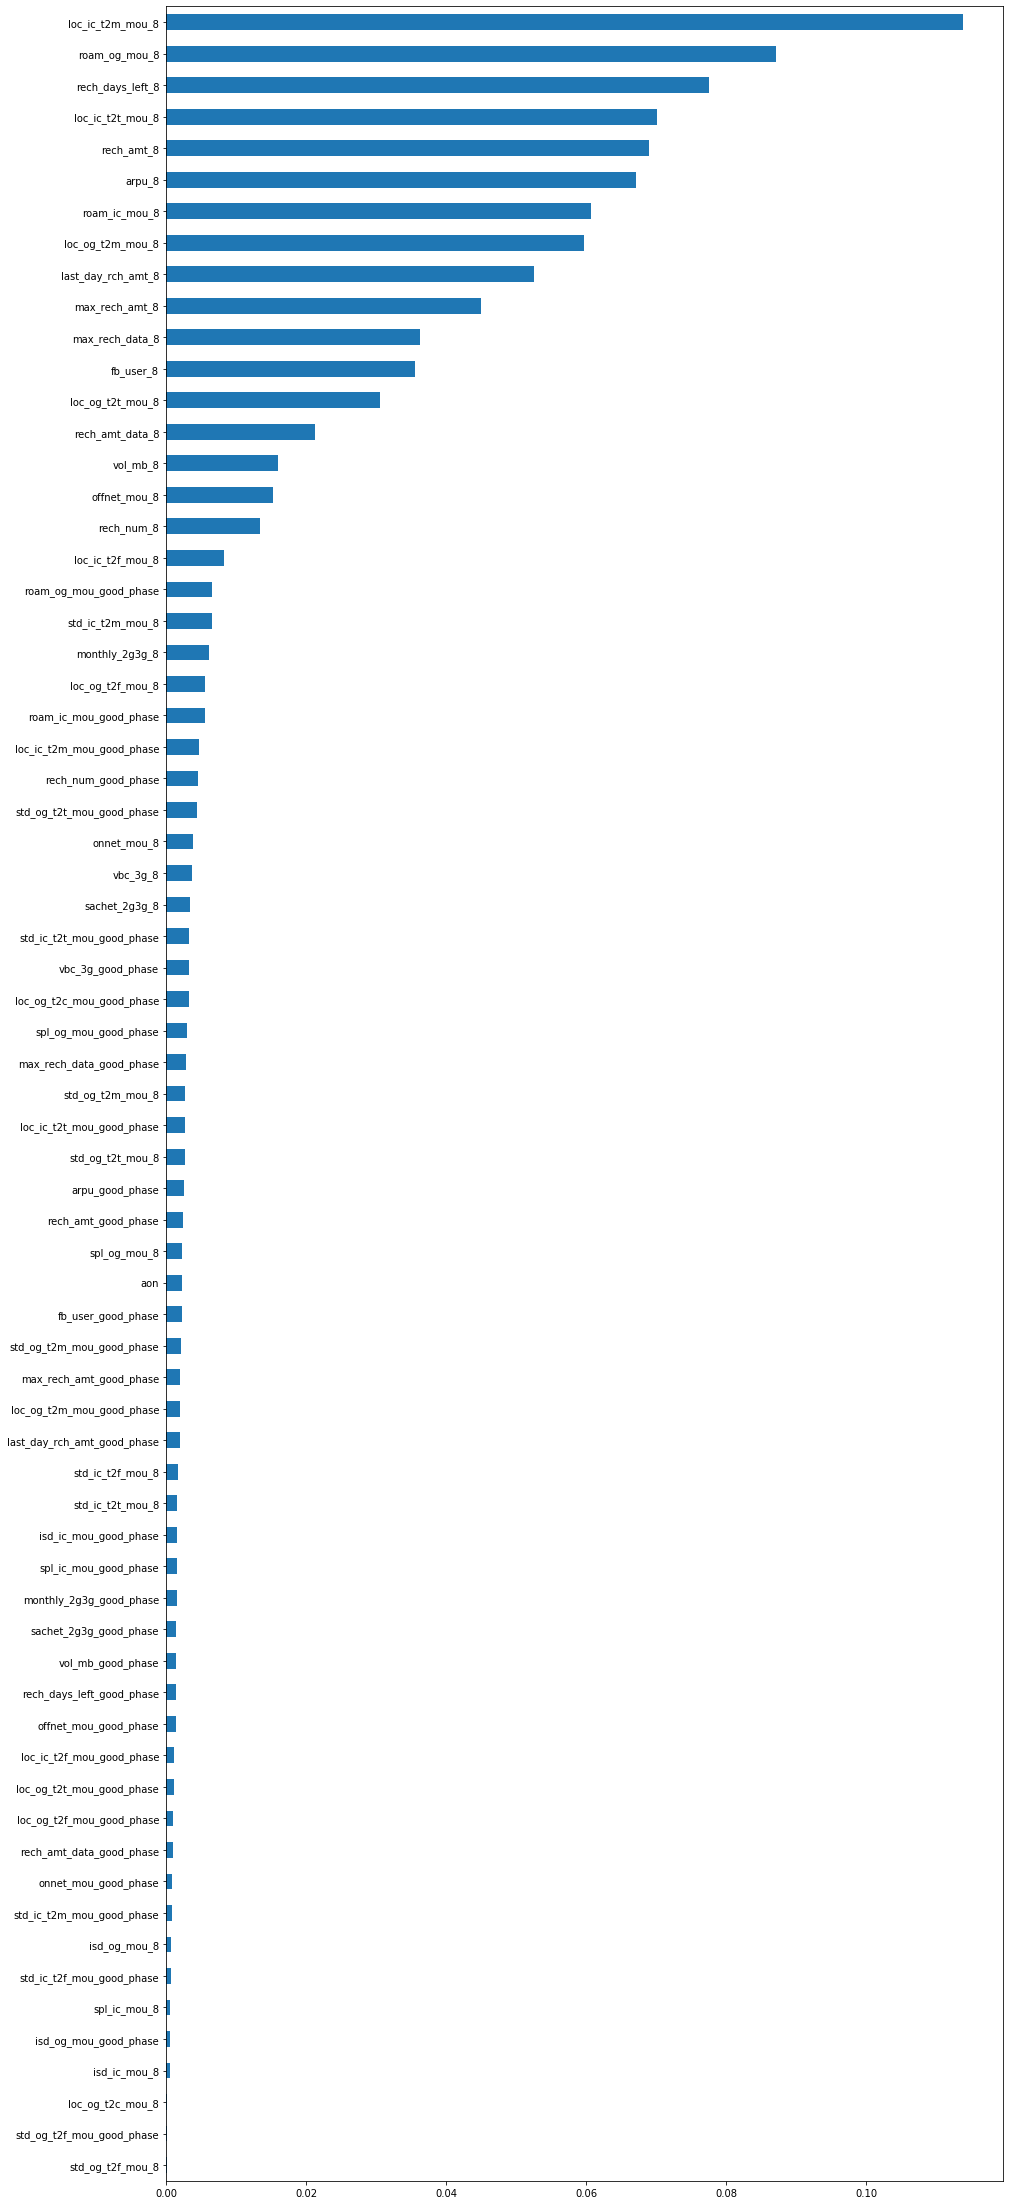

In [119]:
# Checking the feature importance from the random forest model
plt.figure(figsize=(15,40))
features = pd.Series(random_forest_model.feature_importances_, index=X.columns)
features.nlargest(len(X.columns)).sort_values().plot(kind='barh', align='center')

The above plot shows us the significant features for churn prediction.

### Recommendations:

* loc_ic_t2t_mou_8: **local incoming calls within same telecom network**: A drop in the local incoming calls for t2t indicates a high chances of churn. Such customers can be monitored and presented with special tariffs.

* loc_og_t2m_mou_8: **local outgoing calls from telecom operator to other network mobile**: A drop here again indicates a high chances of customer churn. It might be happening due to a customer's requirement of high outgoing calls to other networks.

* roam_og_mou_8: **roaming outgoing calls**: A spike in outgoing roaming calls can cause a customer to churn. High roaming charges might be a reason here. Such customers can be presented with roaming special packs or given an option to switch to a local number with the same operator.

* rech_days_left: **number of days left till the end of the month before the customer recharges**: If a customer waits more and more till the end of the month to recharge, it might be an indication that he's thinking about churning. Such customers can be tracked and given an opportunity to tell their requirements and the problems they might be facing.

Following recommendations can be made based on EDA

* **Loyalty offers**: Loyalty benefits for customers who stay for a longer preiod of time. Customers with high aon value have a lesser chance of churning.
* **Custom Tariffs**: Customers can be given usage specific tariffs for local calls, std calls, roaming calls etc.
* **Better and wider 3G network**: some customers might be churning for better 3G coverage. 3G availability should be increased wherever not available.
* **Lower tariffs on data usage**